In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings 
warnings.filterwarnings(action='ignore')
pd.options.display.max_columns = 150
pd.options.display.max_rows = 200

In [8]:
df = pd.read_csv("C:\\UpgradLendingCase\\loan\\loan.csv")
meta_data = pd.read_excel("C:\\UpgradLendingCase\\loan\\Data_Dictionary.xlsx")

In [27]:
df.head(10)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [11]:
df.shape

(39717, 111)

In [12]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

##Finding meta data description of each column

In [90]:
meta_data

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


In [22]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [35]:
df.describe

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  \
0       36 months   10.65%       162.87     B        B2   
1      

# Data Cleaning 

 Cleaning up the null values

In [38]:
df.isnull().sum()*100/len(df)

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

Finding the unique values as we see  missing values for few variables are >60% . Lets Analyse and then remove them

In [54]:
df['mths_since_last_delinq'].nunique()

95

There are many colums with data missing 100%.So removing the colums with Na >60%

In [143]:
missing = round(100*(df.isnull().sum()/len(df.id)), 2)
missing.loc[missing > 0]
col_with_missing_values =list(missing[missing>60].index)
len(col_with_missing_values)

57

In [144]:
df_loan = df.drop(col_with_missing_values,axis=1)
df_loan.shape

(39717, 54)

In [145]:
missing = round(100*(df_loan.isnull().sum()/len(df.id)), 2)
missing[missing!=0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [130]:
df_loan.desc.unique()

array(['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
       '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
       nan, ...,
       'Our current gutter system on our home is old and in need of repair.    We will be using the borrowed funds to replace the gutter system on our home.',
       'The rate of interest and fees incurred by carrying a balance on my credit card are so outrageous at this point that continuing

#### After dropping the columns with null values , Examine the other column to see if they add any value to for Loan default analysis

In [82]:
df_loan.emp_title.unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

In [84]:
df_loan.desc.nunique()


26527

In [87]:
df_loan.emp_title.nunique() 

28820

In [102]:
df_loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

Checking if there is any relation between emp_lenght and loan status

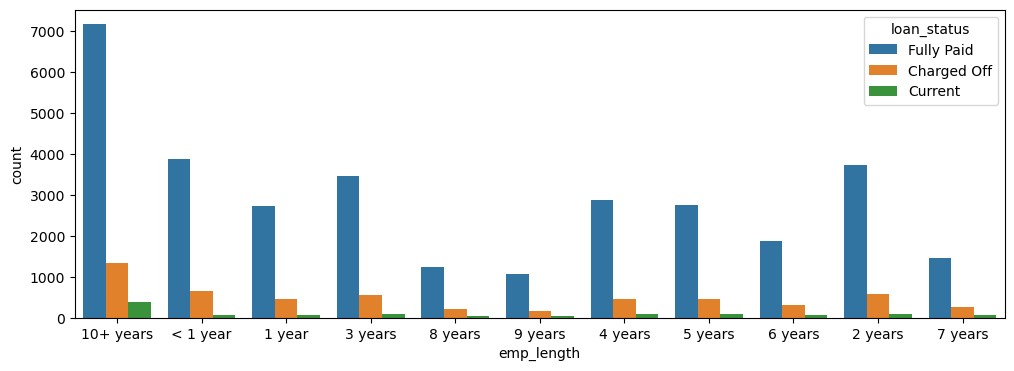

In [105]:
plt.figure(figsize=(12,4))
sns.countplot(x="emp_length", data =df_loan,hue="loan_status")
plt.show()

<AxesSubplot:xlabel='emp_length'>

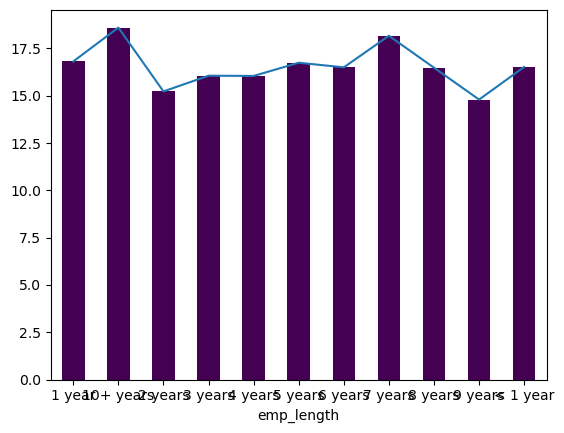

In [119]:
# of employees who did not pay based on their emp lenght 
emp_count=df_loan[df_loan["loan_status"]=="Charged Off"].groupby("emp_length").count()["loan_status"]
#count of people those who did pay considering there emp length
emp_fp=df_loan[df_loan["loan_status"]=='Fully Paid'].groupby("emp_length").count()["loan_status"]

# % of people whoc didnt pay there loan considering there emp length
notpaidpre=emp_count*100/emp_fp
notpaidpre
notpaidpre.plot(kind="bar",colormap="viridis")

notpaidpre.plot()

The employee length is not helping with charge off, so we can drop that column

Other catgorical column

In [126]:
df_loan.revol_util.nunique()

1089

In [127]:
df_loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [131]:
df_loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [132]:
df_loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [133]:
df_loan.tax_liens.unique()

array([ 0., nan])

Catagorical columns collections_12_mths_ex_med,chargeoff_within_12_mths,loan.tax_liens have values of 0 or Nan,so will not add values to the analysis. Column desc and emp_title lenght also can be dropped

In [147]:
Columns_to_Drop_ls = ['collections_12_mths_ex_med','chargeoff_within_12_mths',
                      'tax_liens','desc','emp_length','emp_title']
df_loan = df_loan.drop(Columns_to_Drop_ls,axis =1)

In [148]:
df_loan.shape

(39717, 48)

In [149]:
(df_loan.isnull().sum()/len(df))*100

id                         0.000000
member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
pymnt_plan                 0.000000
url                        0.000000
purpose                    0.000000
title                      0.027696
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0

In [150]:
df_loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

There are 37339 with value 0 , want to keep it as it is . removing the rest of null rows , will check on those later and remove if not required

In [160]:
df_loan=df_loan[~df_loan.revol_util.isnull()]


In [ ]:
###This column has null values 

In [161]:
df_loan=df_loan[~df_loan.last_pymnt_d.isnull()]

In [162]:
(df_loan.isnull().sum()/len(df))*100

id                         0.000000
member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
pymnt_plan                 0.000000
url                        0.000000
purpose                    0.000000
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0

In [154]:
df_loan.purpose.head(10)

0           credit_card
1                   car
2        small_business
3                 other
4                 other
5               wedding
6    debt_consolidation
7                   car
8        small_business
9                 other
Name: purpose, dtype: object

In [163]:
df_loan.shape

(39600, 47)

In [164]:
missing =round(100*(df_loan.isnull().sum()/len(df_loan.id)), 2) 
missing[missing != 0]

last_credit_pull_d      0.01
pub_rec_bankruptcies    1.76
dtype: float64

In [155]:
df_loan.title.head(10)

0                                 Computer
1                                     bike
2                     real estate business
3                                 personel
4                                 Personal
5    My wedding loan I promise to pay back
6                                     Loan
7                          Car Downpayment
8     Expand Business & Buy Debt Portfolio
9              Building my credit history.
Name: title, dtype: object

looking at these 2 columns we can remove the title col as Title and purpose looks similar

In [ ]:
df_loan.drop("title",inplace =True, axis =1)

In [165]:
df_loan.shape

(39600, 47)

In [166]:
df_loan.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    884
funded_amnt                 1040
revol_util                  1089
out_prncp                   1137
out_prncp_

In [177]:

df_loan.delinq_amnt.unique()

array([0], dtype=int64)

In [179]:

df_loan.acc_now_delinq.unique()

array([0], dtype=int64)

In [167]:
df_loan.url.unique()

array(['https://lendingclub.com/browse/loanDetail.action?loan_id=1077501',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=1077430',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=1077175',
       ...,
       'https://lendingclub.com/browse/loanDetail.action?loan_id=90395',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=90376',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=87023'],
      dtype=object)

In [168]:
df_loan.application_type.unique()


array(['INDIVIDUAL'], dtype=object)

In [169]:
df_loan.zip_code.unique()


array(['860xx', '309xx', '606xx', '917xx', '972xx', '852xx', '280xx',
       '900xx', '958xx', '774xx', '853xx', '913xx', '245xx', '951xx',
       '641xx', '921xx', '067xx', '890xx', '770xx', '335xx', '799xx',
       '605xx', '150xx', '326xx', '564xx', '141xx', '080xx', '330xx',
       '974xx', '934xx', '405xx', '946xx', '445xx', '850xx', '604xx',
       '292xx', '088xx', '180xx', '029xx', '700xx', '010xx', '441xx',
       '104xx', '061xx', '616xx', '947xx', '914xx', '765xx', '980xx',
       '017xx', '752xx', '787xx', '077xx', '540xx', '225xx', '440xx',
       '437xx', '559xx', '912xx', '325xx', '300xx', '923xx', '352xx',
       '013xx', '146xx', '074xx', '786xx', '937xx', '331xx', '115xx',
       '191xx', '114xx', '908xx', '902xx', '992xx', '750xx', '950xx',
       '329xx', '226xx', '614xx', '802xx', '672xx', '083xx', '100xx',
       '926xx', '931xx', '712xx', '060xx', '707xx', '342xx', '895xx',
       '430xx', '919xx', '996xx', '891xx', '935xx', '801xx', '928xx',
       '233xx', '927

In [171]:
df_loan.initial_list_status.unique()

array(['f'], dtype=object)

In [173]:
df_loan.policy_code.unique()

array([1], dtype=int64)

In [174]:
df_loan.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [175]:

df_loan.delinq_amnt.unique()

array([0], dtype=int64)

##dropping the columns based on the values 1 unique, url and zipcode or not adding value to the analysis 

In [186]:
col_tobe_dropped =['acc_now_delinq','delinq_amnt','policy_code','initial_list_status','zip_code',
                  'application_type','url','delinq_amnt']

df_loan = df_loan.drop(col_tobe_dropped, axis =1)              

In [190]:
df_loan.drop("id", axis =1, inplace =True)

In [191]:
df_loan.drop("member_id", axis =1 , inplace =True)

In [192]:
df_loan.shape

(39600, 38)

In [193]:
df_loan.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv     

In [198]:

## dropping the funded_amnt_inv as it will not influnce whether loan will default 
df_loan.drop("funded_amnt_inv",axis =1 , inplace =True)

In [199]:
df_loan.shape

(39600, 37)

In [208]:
df_loan[df_loan.loan_status =="Current"]

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
4,3000,3000,60 months,12.69%,67.79,B,B5,RENT,80000.0,Source Verified,Dec-11,Current,n,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.0,0.0,0.0,May-16,67.79,May-16,0.0
32,10000,10000,60 months,15.96%,242.97,C,C5,RENT,29120.0,Verified,Dec-11,Current,n,debt_consolidation,FL,22.83,0,Feb-97,1,11,0,16158,63.60%,31,1849.10,1844.43,12594.24,12562.85,8150.89,4443.35,0.0,0.0,0.0,May-16,242.97,Apr-16,0.0
39,12500,12500,60 months,12.69%,282.44,B,B5,RENT,27000.0,Verified,Dec-11,Current,n,debt_consolidation,IL,16.04,0,Dec-01,3,6,0,10143,50%,24,2181.42,2177.03,14636.30,14607.08,10318.58,4317.72,0.0,0.0,0.0,May-16,282.44,May-16,0.0
86,14000,14000,60 months,17.27%,349.98,D,D3,RENT,28000.0,Verified,Dec-11,Current,n,other,WA,6.34,0,Jul-05,2,5,0,6986,79.40%,10,2637.34,2632.59,18176.96,18144.59,11362.67,6814.29,0.0,0.0,0.0,May-16,349.98,May-16,0.0
95,15300,15300,60 months,22.06%,423.10,F,F4,RENT,85000.0,Verified,Dec-11,Current,n,credit_card,VA,20.58,0,Feb-84,2,14,0,26524,89.70%,27,3125.79,3120.68,21988.20,21952.28,12174.21,9813.99,0.0,0.0,0.0,May-16,423.10,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15972,10400,10400,60 months,6.00%,218.99,E,E3,MORTGAGE,29000.0,Source Verified,May-11,Current,n,credit_card,TX,10.84,0,Nov-02,0,7,0,8696,95.60%,15,238.82,238.82,13886.92,13886.92,10161.18,3725.74,0.0,0.0,0.0,May-16,218.99,May-16,0.0
15981,6000,6000,60 months,10.37%,128.58,B,B3,RENT,24000.0,Source Verified,Apr-11,Current,n,car,NY,11.05,0,Oct-05,0,6,0,12,0.20%,9,10.26,10.26,7701.15,7701.15,5989.74,1711.41,0.0,0.0,0.0,May-16,128.58,May-16,0.0
16361,19200,19200,60 months,10.74%,414.97,B,B4,MORTGAGE,100000.0,Verified,Apr-11,Current,n,small_business,NJ,4.43,0,Jan-91,0,6,0,0,0%,10,19.12,19.09,24894.24,24310.75,19180.88,5713.36,0.0,0.0,0.0,May-16,414.97,May-16,0.0
16609,9350,9350,60 months,10.00%,198.66,B,B2,RENT,66000.0,Not Verified,Apr-11,Current,n,car,NY,4.84,0,Dec-01,0,4,0,88,5.90%,7,13.28,13.28,11906.14,11906.14,9336.72,2569.42,0.0,0.0,0.0,May-16,198.66,Apr-16,0.0


In [204]:
##### as this is a on-going loan we can consider to remove this as this will not give any insights for default


In [211]:
df_loan_fd = df_loan[~(df_loan.loan_status =="Current")]

In [212]:
df_loan_fd.shape

(38460, 37)

In [215]:
df_loan_fd.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,36 months,10.65%,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,60 months,15.27%,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,36 months,15.96%,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,36 months,13.49%,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,5000,5000,36 months,7.90%,156.46,A,A4,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


##updating the correct datatypes for the colums 

In [ ]:
##Term - removing the months and updating 

In [216]:
df_loan_fd.term = df_loan_fd.term.str.replace("months" ,"").astype('int')

In [218]:
df_loan_fd.term.unique()

array([36, 60])

In [ ]:
### from the above dataframe we see there are 2 columns have % in them - int_rate,revol_util

In [219]:
df_loan_fd.int_rate = df_loan_fd.int_rate.str.replace('%','').astype('float')
df_loan_fd.revol_util = df_loan_fd.revol_util.str.replace('%','').astype('float')

In [220]:
df_loan_fd.int_rate.value_counts()

10.99    913
7.51     786
11.49    786
13.49    747
7.88     725
        ... 
16.33      1
16.15      1
16.01      1
10.64      1
16.20      1
Name: int_rate, Length: 370, dtype: int64

In [221]:
df_loan_fd.revol_util.value_counts()

0.00     952
63.00     62
0.20      61
31.20     57
40.70     57
        ... 
77.63      1
25.74      1
0.83       1
47.36      1
7.28       1
Name: revol_util, Length: 1088, dtype: int64

####verify the date columns and update them with datetime datatype

In [223]:
df_loan_fd.issue_d.unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [284]:
df_loan_fd.earliest_cr_line.head(10)

0    1985-01-01
1    1999-04-01
2    2001-11-01
3    1996-02-01
5    2004-11-01
6    2005-07-01
7    2007-01-01
8    2004-04-01
9    2004-09-01
10   1998-01-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [228]:
### earliest_cr_line data does not looks correct , lets split and check 

df_loan_fd.earliest_cr_line = pd.to_datetime(df_loan_fd.earliest_cr_line, format='%b-%y')


In [239]:
df_loan_fd.earliest_cr_line.head(5)

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
5   2004-11-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [235]:

df_loan_fd.issue_d = pd.to_datetime(df_loan_fd.issue_d, format='%b-%y')

In [237]:

df_loan_fd.last_pymnt_d = pd.to_datetime(df_loan_fd.last_pymnt_d, format='%b-%y')

df_loan_fd.last_credit_pull_d = pd.to_datetime(df_loan_fd.last_credit_pull_d, format='%b-%y')

In [238]:
df_loan_fd.last_credit_pull_d.head(5)

0   2016-05-01
1   2013-09-01
2   2016-05-01
3   2016-04-01
5   2016-01-01
Name: last_credit_pull_d, dtype: datetime64[ns]

In [240]:
df_loan_fd['earliest_cr_line_month'] = df_loan_fd.earliest_cr_line.dt.month
df_loan_fd['earliest_cr_line_year'] = df_loan_fd.earliest_cr_line.dt.year

In [241]:
df_loan_fd['earliest_cr_line_month'].unique()

array([ 1,  4, 11,  2,  7,  9, 10,  5,  8,  6, 12,  3], dtype=int64)

In [242]:
df_loan_fd['earliest_cr_line_year'].unique()

array([1985, 1999, 2001, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991,
       1993, 1997, 1983, 2002, 1984, 2006, 1987, 1981, 2000, 1994, 1995,
       1992, 1986, 1990, 1988, 1980, 2008, 1979, 1978, 1971, 1972, 1970,
       1969, 1975, 1982, 1976, 1977, 2062, 1973, 2068, 1974, 2067, 2065,
       2063, 2054, 2066, 2064, 2059, 2056, 2046, 2050, 2061], dtype=int64)

In [246]:
### in this date column we see data >2011 which is not correct 

len (df_loan_fd[df_loan_fd['earliest_cr_line_year'] >2011])

85

In [ ]:
###with 85 rows >2011 , I will leave this column out of the Analysis

In [247]:
df_loan_fd['issue_d_month'] = df_loan_fd.issue_d.dt.month
df_loan_fd['issue_d_year'] = df_loan_fd.issue_d.dt.year

In [249]:
df_loan_fd['issue_d_year'].unique()

array([2011, 2010, 2009, 2008, 2007], dtype=int64)

In [250]:

df_loan_fd['last_pymnt_d_month'] = df_loan_fd.last_pymnt_d.dt.month
df_loan_fd['last_pymnt_d_year'] = df_loan_fd.last_pymnt_d.dt.year
df_loan_fd['last_pymnt_d_year'].unique()

array([2015, 2013, 2014, 2016, 2012, 2011, 2010, 2009, 2008], dtype=int64)

In [251]:

df_loan_fd['last_credit_pull_d_month'] = df_loan_fd.last_credit_pull_d.dt.month
df_loan_fd['last_credit_pull_d_year'] = df_loan_fd.last_credit_pull_d.dt.year
df_loan_fd['last_credit_pull_d_year'].unique()

array([2016., 2013., 2014., 2012., 2015., 2011., 2010.,   nan, 2007.,
       2009., 2008.])

In [340]:
df_loan_fd = df_loan_fd[~df_loan_fd.pub_rec_bankruptcies.isnull()]

In [341]:
df_loan_fd.shape

(37763, 45)

# Analysis 

## Univariate Analysis

In [342]:
########Creating a new dataframe for analysis
df_loan_A = df_loan_fd

In [343]:
df_loan_A.shape

(37763, 45)

######### Loan Status colum

In [344]:
df_loan_fd.loan_status.value_counts()

Fully Paid     32337
Charged off     5426
Name: loan_status, dtype: int64

In [262]:
## Plotting the loan status distribution after clean up

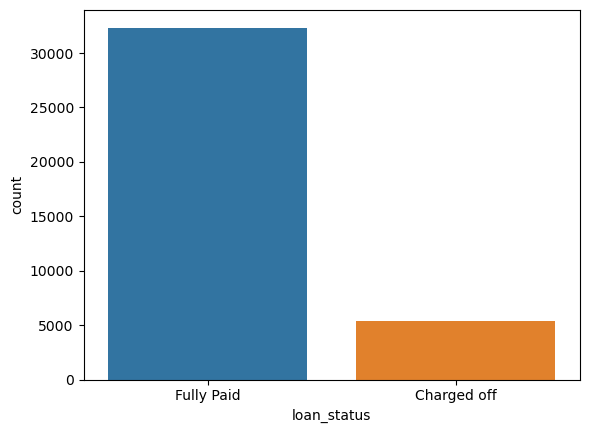

In [345]:
sns.countplot(x="loan_status",data=df_loan_A)
plt.show()

##more loan are paid off compared to Charged off , so there is still the imbalance 

#####Compare the other variables ..like the loan_amt 

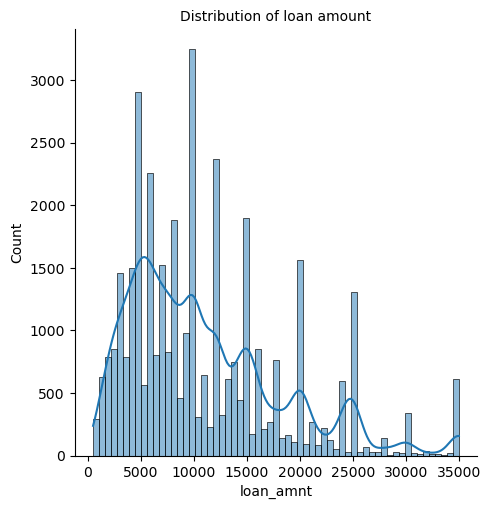

In [346]:
sns.displot(df_loan_A.loan_amnt, kde=True)
plt.title('Distribution of loan amount', fontsize ="10")
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

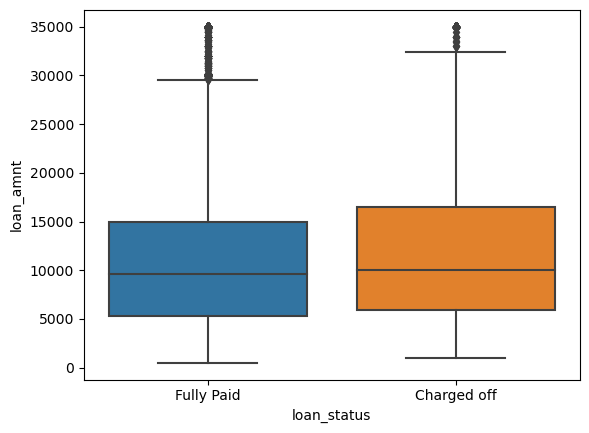

In [347]:
# creating boxplot 
sns.boxplot(x="loan_status",y="loan_amnt",data=df_loan_A)

In [348]:

# checking mean value of loan approved 
df_loan_A.groupby("loan_status")["loan_amnt"].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged off,5426.0,12157.353483,8095.718435,1000.0,5875.0,10000.0,16500.0,35000.0
Fully Paid,32337.0,10899.184371,7216.498432,500.0,5275.0,9600.0,15000.0,35000.0


Based on graphs we can analyse that the number of loans are more for the lower amount compare to higher amount , 
More loans are issues are below the 75 percentile. From this statics we can analyse that there is not much difference between
the defaulters when we take loan amount into consideration.So loan amount is not a good factor to decide whether a person will deafult or not

In [ ]:
## GRADE COLUMN

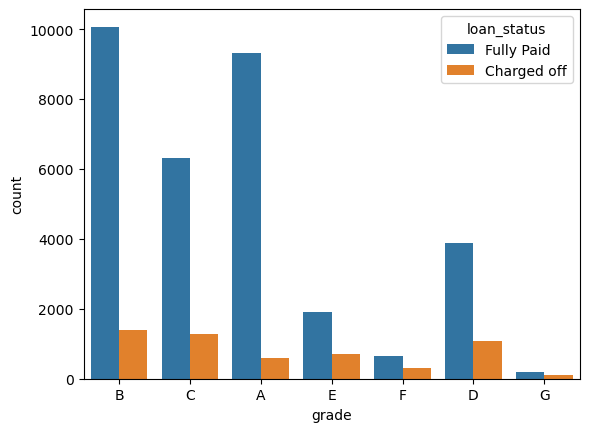

In [349]:
sns.countplot(x="grade",hue="loan_status",data=df_loan_A)
plt.show()

In [ ]:
From this grahp as the Grades move from A to G , defaults are more

In [ ]:
So as per the above graph the loan under grade A and B are defaulting less compared to the D,E,F
Max default is under grade F and G . 

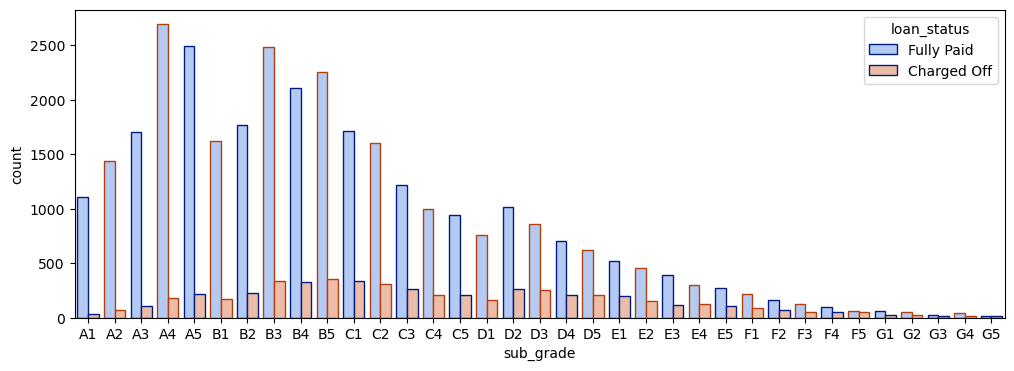

In [289]:
# sub grade plot
plt.figure(figsize=(12,4))
sub_order=sorted(df_loan_A["sub_grade"].unique())
sns.countplot(x='sub_grade',data=df_loan_A,order=sub_order,palette="coolwarm",hue="loan_status",
              edgecolor=sns.color_palette("dark", 2))
plt.show()

So Loan under subgrades F and G are defaluting more

In [307]:
#creating corelation plot
#plt.figure(figsize=(12,4))
#df_loan_A.corr()["loan_status"].sort_values().drop("loan_status").plot(kind="bar")
#plt.show()

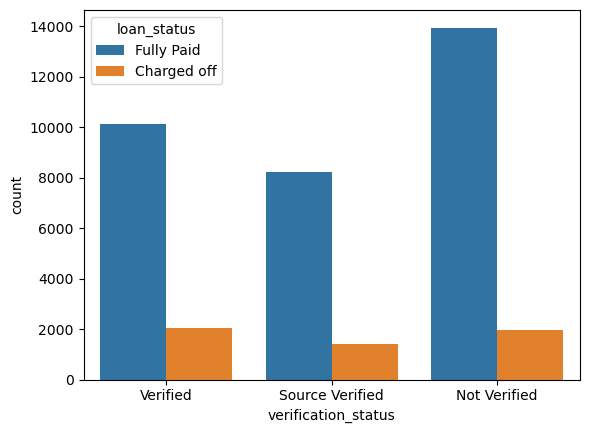

In [352]:
#verification status graph
sns.countplot(x="verification_status",data=df_loan_A,hue="loan_status")
plt.show()

In [315]:
df_loan_A.verification_status.value_counts()

Not Verified       16630
Verified           12177
Source Verified     9653
Name: verification_status, dtype: int64

In [327]:

df_loan_A[df_loan_A.verification_status == 'Verified'].groupby('loan_status')['verification_status'].count()*100/len(df_loan_A[df_loan_A.verification_status == 'Verified'])

loan_status
Charged off    16.637924
Fully Paid     83.362076
Name: verification_status, dtype: float64

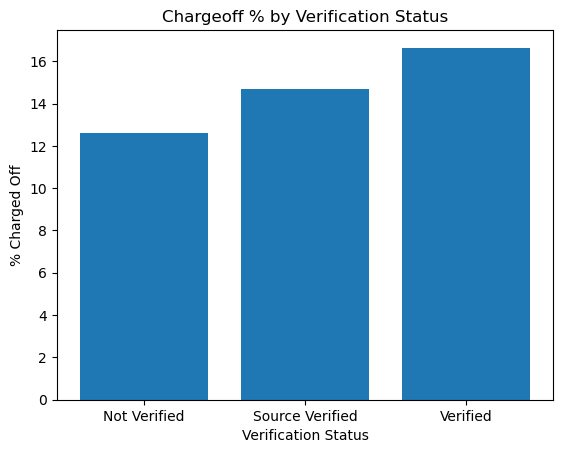

In [326]:

Per_NVer= df_loan_A[df_loan_A.verification_status == 'Not Verified'].groupby('loan_status')['verification_status'].count()*100/len(df_loan_A[df_loan_A.verification_status == 'Not Verified'])
Per_SVer= df_loan_A[df_loan_A.verification_status == 'Source Verified'].groupby('loan_status')['verification_status'].count()*100/len(df_loan_A[df_loan_A.verification_status == 'Source Verified'])
Per_Ver= df_loan_A[df_loan_A.verification_status == 'Verified'].groupby('loan_status')['verification_status'].count()*100/len(df_loan_A[df_loan_A.verification_status == 'Verified'])


Ver_Status = ['Not Verified','Source Verified','Verified']
chargeoff_VerStatus = [Per_NVer['Charged off'], Per_SVer['Charged off'], Per_Ver['Charged off']]
plt.bar(Ver_Status, chargeoff_VerStatus)
plt.title('Chargeoff % by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('% Charged Off')
plt.show()

Observation for the Verification status show more default in loans that are verified ,
which show the verification company verificatication process is not correct.

Purpose column

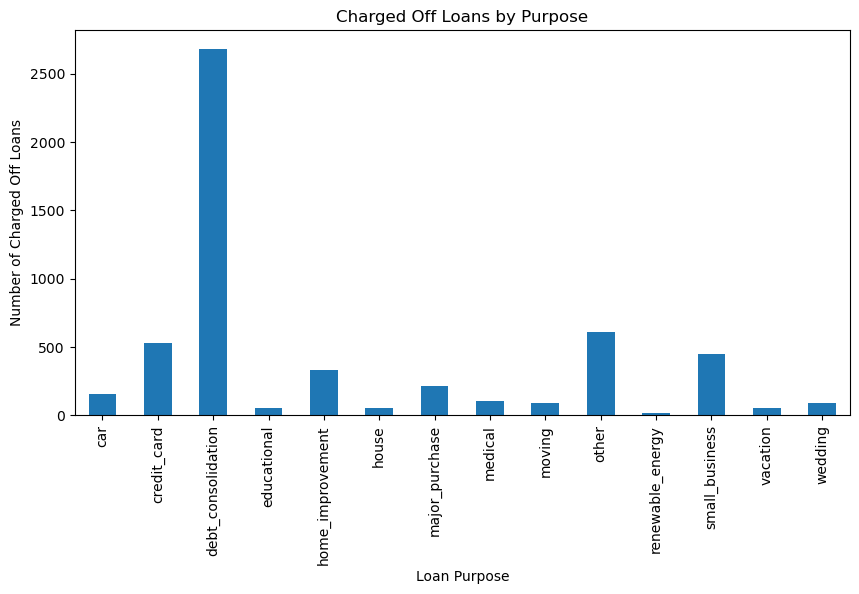

In [353]:
grouped = df_loan_A[df_loan_A['loan_status'] == 'Charged off'].groupby('purpose').count()['loan_status']
grouped.plot(kind='bar', figsize=(10,5))
plt.xlabel('Loan Purpose')
plt.ylabel('Number of Charged Off Loans')
plt.title('Charged Off Loans by Purpose')
plt.show()

As per the above graph number high defaults are where the purpose is debt consolidation

In [ ]:
Term COlumn

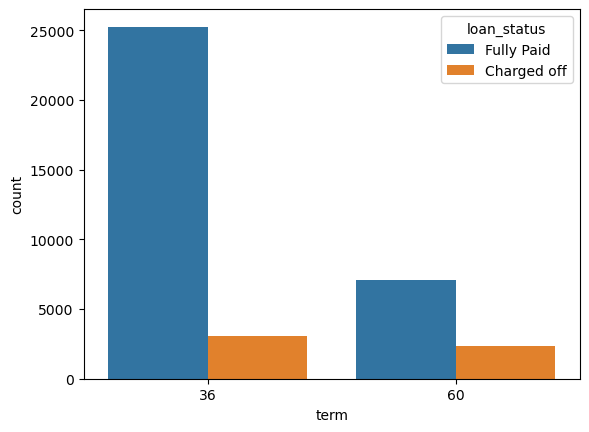

In [354]:
#verification term variable graph
sns.countplot(x="term",data=df_loan_A,hue="loan_status")
plt.show()

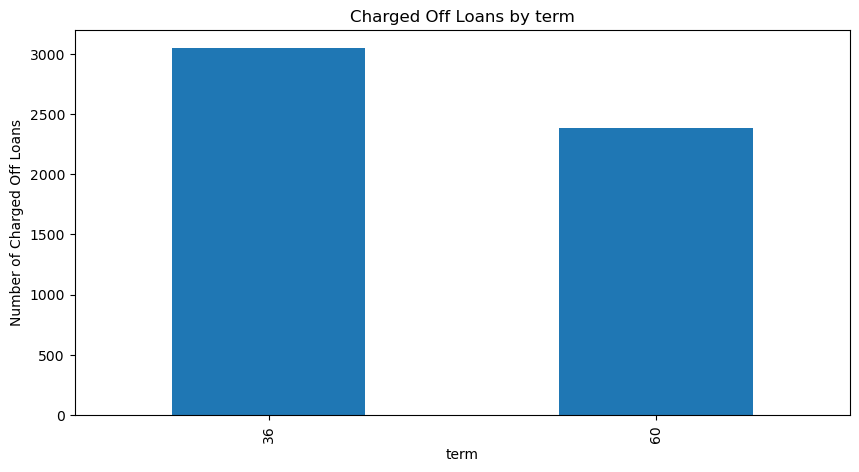

In [355]:
grouped = df_loan_A[df_loan_A['loan_status'] == 'Charged off'].groupby('term').count()['loan_status']
grouped.plot(kind='bar', figsize=(10,5))
plt.xlabel('term')
plt.ylabel('Number of Charged Off Loans')
plt.title('Charged Off Loans by term')
plt.show()

###Defaults are higher where the term is low.

Variable: pub_rec_bankruptcy

In [356]:
df_loan_A.pub_rec_bankruptcies.value_counts()

0.0    36128
1.0     1630
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

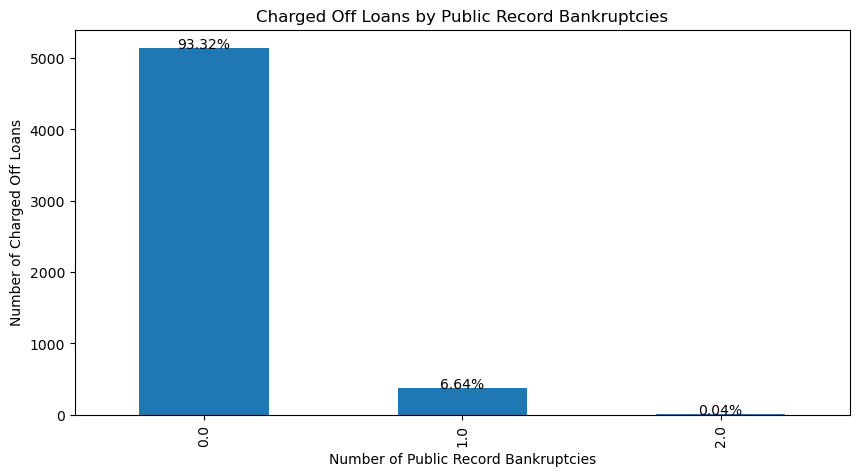

In [358]:

grouped = df[df['loan_status'] == 'Charged Off'].groupby('pub_rec_bankruptcies').count()['loan_status']
percentages = (grouped / grouped.sum()) * 100
ax = grouped.plot(kind='bar', figsize=(10,5))
plt.xlabel('Number of Public Record Bankruptcies')
plt.ylabel('Number of Charged Off Loans')
plt.title('Charged Off Loans by Public Record Bankruptcies')
for i, v in enumerate(grouped):
    ax.text(i, v, str(round(percentages[i],2)) + '%', ha='center')
plt.show()



From this we dont get much update as % who have default earlier due to bankruptcies are less

Distribution of loan over time 

In [377]:
df_loan_A.issue_d_year.value_counts()

2011    20470
2010    11494
2009     4688
2008     1104
2007        7
Name: issue_d_year, dtype: int64

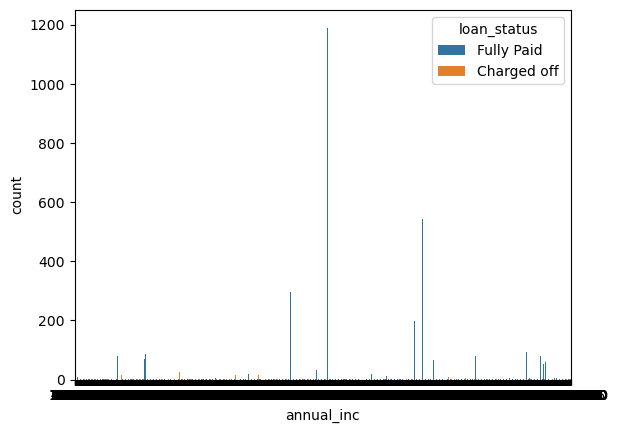

In [378]:
sns.countplot(x="annual_inc",data=df_loan_A,hue="loan_status")
plt.show()

In [379]:
#replacing fully paid with 0 and charge off as 1
df_loan_A["loan_status"]=df_loan_A["loan_status"].apply(lambda x : 1 if x=="Charged off" else 0)

<AxesSubplot:xlabel='annual_inc'>

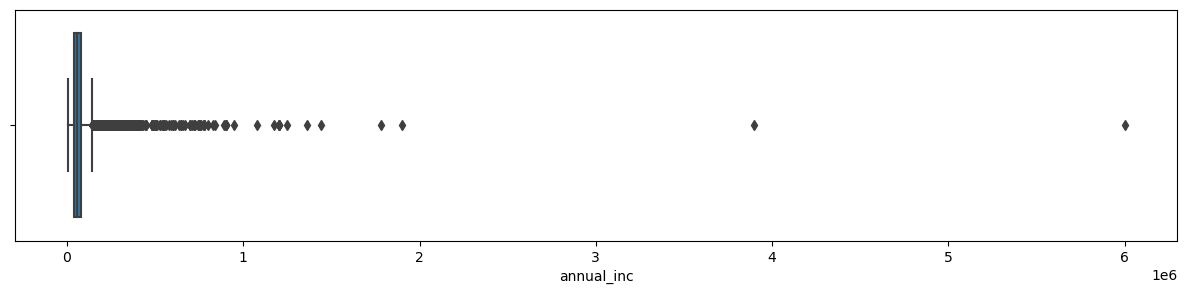

In [387]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=df_loan_A['annual_inc'], data=df_loan_A)

In [390]:
# Let's get rid of outliers to analyze annual income. 

df_A = df_loan_A[np.abs(df_loan_A.annual_inc-df_loan_A.annual_inc.mean()) <= (3*df_loan_A.annual_inc.std())]

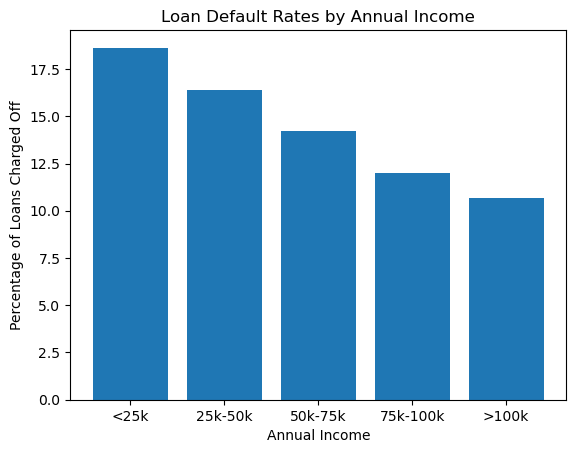

In [391]:
# Create income buckets based on annual income
income_buckets = pd.cut(df['annual_inc'], [0, 25000, 50000, 75000, 100000, float('inf')], labels=['<25k', '25k-50k', '50k-75k', '75k-100k', '>100k'])

# Calculate the percentage of loans that charged off in each income bucket
default_rates = df_A.groupby(income_buckets)['loan_status'].apply(lambda x: (x==1).mean()*100)

# Create a bar chart of the default rates by income bucket
plt.bar(default_rates.index, default_rates.values)

# Add labels and title to the plot
plt.xlabel('Annual Income')
plt.ylabel('Percentage of Loans Charged Off')
plt.title('Loan Default Rates by Annual Income')
plt.show()


In [ ]:
Loan defaults are higher for lower income, and progressively reduce as incomes go up.

<AxesSubplot:xlabel='issue_d_month', ylabel='count'>

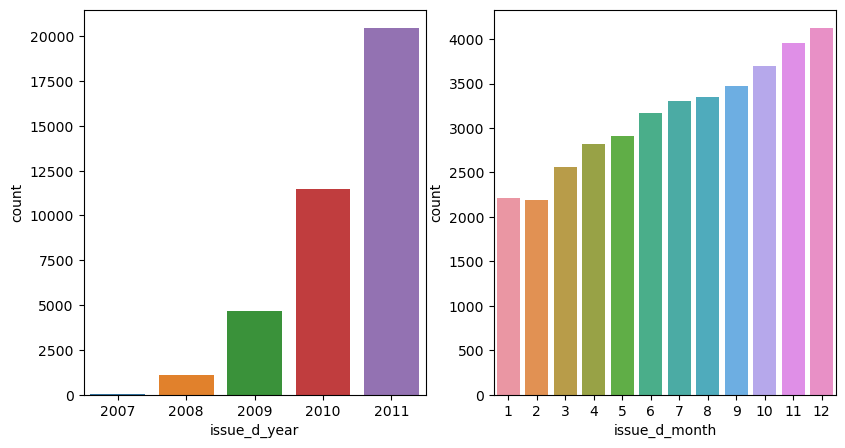

In [394]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.countplot(df_loan_A['issue_d_year'], order=sorted(df_loan_A.issue_d_year.unique()))

plt.subplot(1, 3, 2)
sns.countplot(df_loan_A['issue_d_month'], order=sorted(df_loan_A.issue_d_month.unique()))



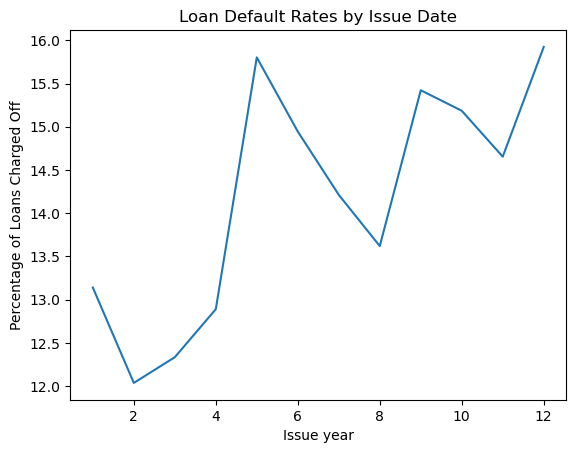

In [397]:


# Calculate the percentage of loans that charged off in each issue month
default_rates = df_loan_A.groupby('issue_d_month')['loan_status'].apply(lambda x: (x==1).mean()*100)

# Create a line plot of the default rates by issue month
plt.plot(default_rates.index, default_rates.values)

# Add labels and title to the plot
plt.xlabel('Issue Month')
plt.ylabel('Percentage of Loans Charged Off')
plt.title('Loan Default Rates by Issue Month')
plt.show()



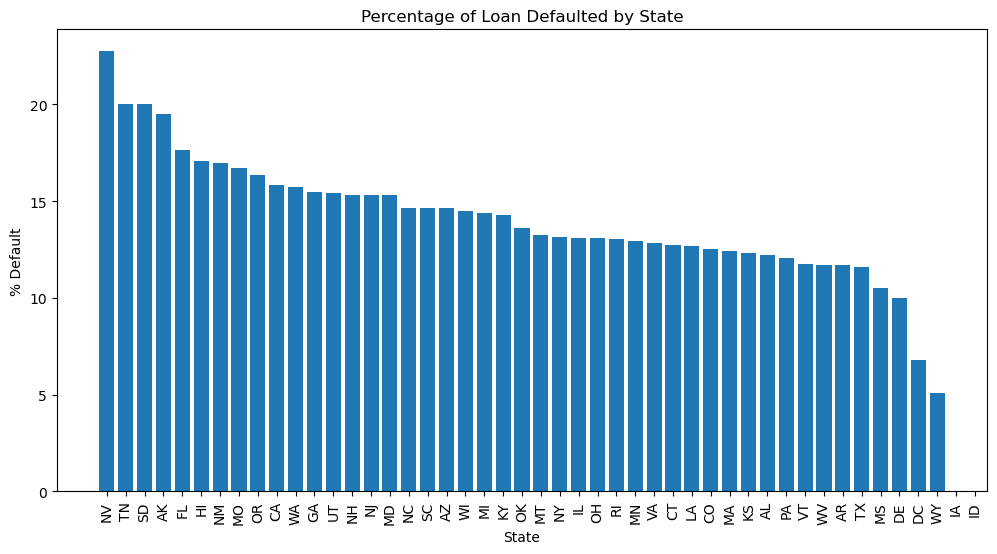

In [407]:

# Calculate the percentage of defaulted loans for each state
state_counts = df_loan_fd.groupby('addr_state')['loan_status'].value_counts(normalize=True).unstack()
state_counts['% Default'] = state_counts['Charged off'] * 100

# Sort the states by the percentage of defaulted loans
state_counts = state_counts.sort_values('% Default', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12,6))
plt.bar(state_counts.index, state_counts['% Default'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('% Default')
plt.title('Percentage of Loan Defaulted by State')
plt.show()




State NV has the max default of loans, but the distirbution for other states are just slighty less. So this Variables
cannot be used for aanalysis of loan defaults. So better to ignore it.

In [ ]:
Variable dti

In [409]:
df_loan_A.dti.describe()

count    37763.000000
mean        13.323132
std          6.662051
min          0.000000
25%          8.190000
50%         13.410000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

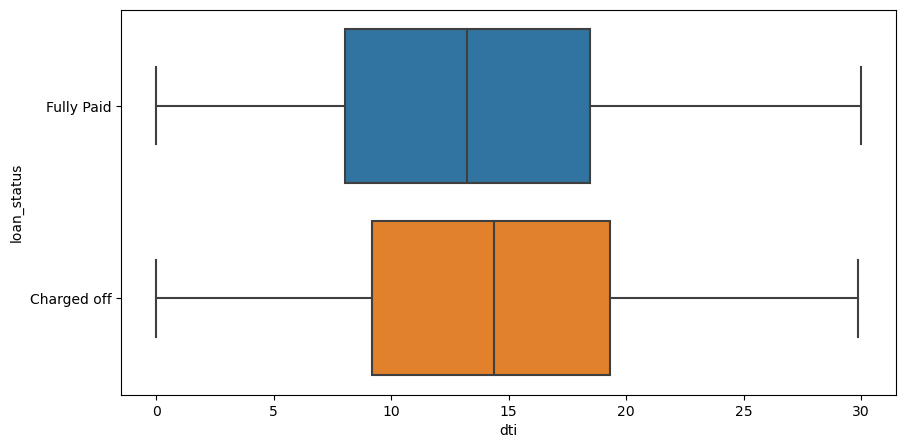

In [411]:

plt.figure(figsize=[10,5])
sns.boxplot(df_loan_A.dti, df_loan_A.loan_status)
plt.show()

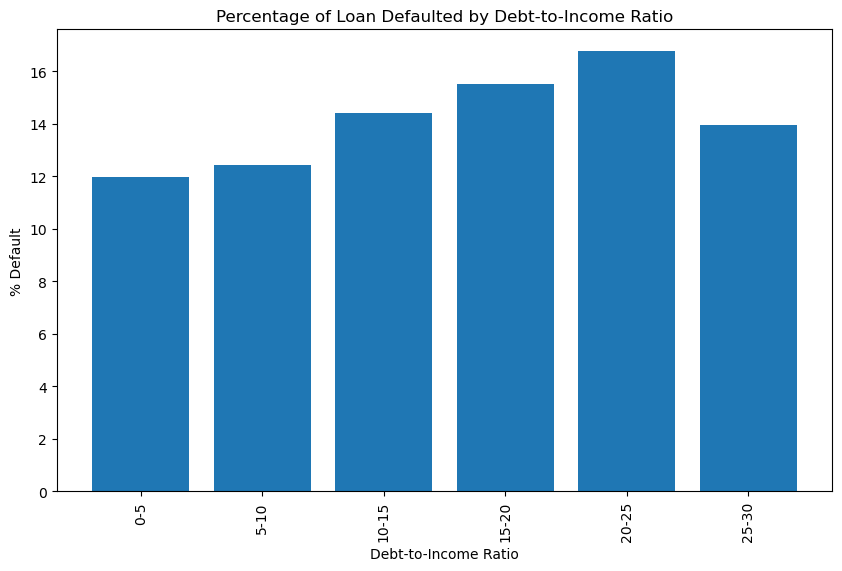

In [416]:
# Calculate the percentage of defaulted loans for each dti value
dti_counts = df_loan_fd.groupby(pd.cut(df['dti'], bins=[0, 5, 10, 15, 20, 25,30],labels=['0-5','5-10','10-15','15-20','20-25','25-30']))['loan_status'].value_counts(normalize=True).unstack()
dti_counts['% Default'] = dti_counts['Charged off'] * 100

# Plot the bar chart
plt.figure(figsize=(10,6))
plt.bar(dti_counts.index.astype(str), dti_counts['% Default'])
plt.xticks(rotation=90)
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('% Default')
plt.title('Percentage of Loan Defaulted by Debt-to-Income Ratio')
plt.show()


Loan with higher dti have chances to default more

Variable - delinq_2yrs


In [423]:
df_loan_A.delinq_2yrs.value_counts()

0     33683
1      3130
2       653
3       202
4        56
5        21
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

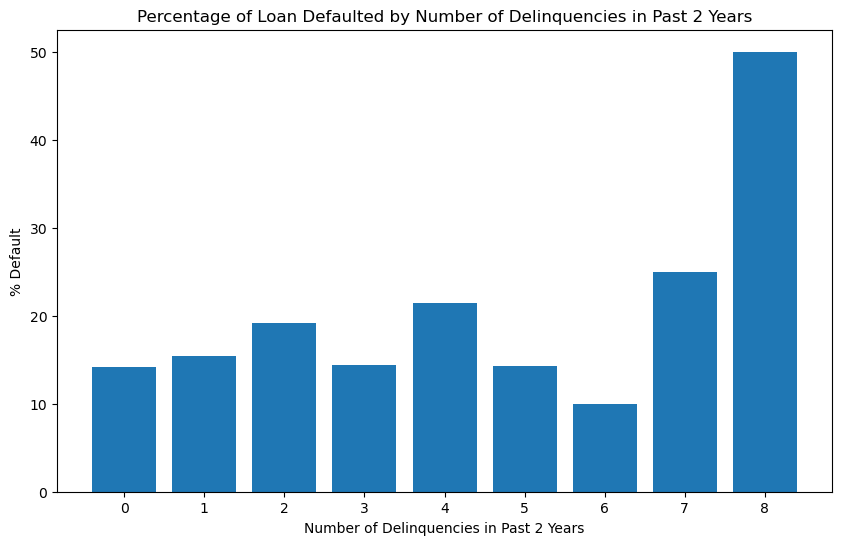

In [422]:
# Calculate the percentage of defaulted loans for each delinq_2yrs value
delinq_counts = df_loan_A.groupby('delinq_2yrs')['loan_status'].value_counts(normalize=True).unstack()
delinq_counts['% Default'] = delinq_counts['Charged off'] * 100

# Plot the bar chart
plt.figure(figsize=(10,6))
plt.bar(delinq_counts.index.astype(str), delinq_counts['% Default'])
plt.xlabel('Number of Delinquencies in Past 2 Years')
plt.ylabel('% Default')
plt.title('Percentage of Loan Defaulted by Number of Delinquencies in Past 2 Years')

plt.show()


The resulting plot shows the percentage of defaulted loans for different numbers of delinquencies in the past 2 years values ranges between 0 and 11.
There are higher chances of default if this variable is greater than 1.

# Bivariate Analysis

loan_amnt and annual_inc

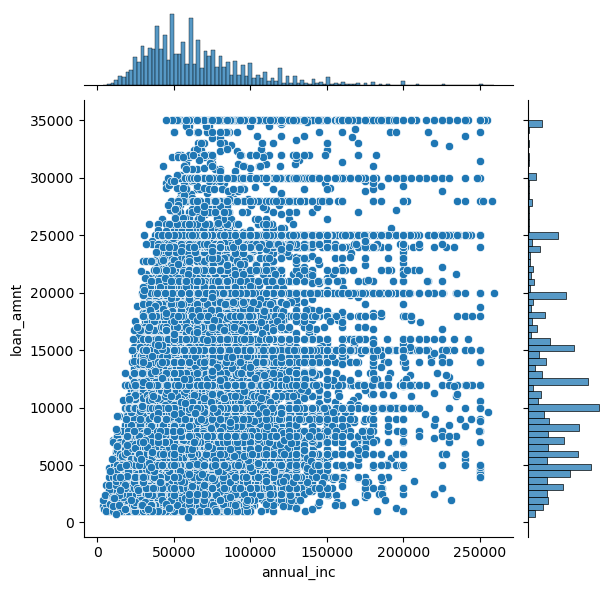

In [425]:
sns.jointplot('annual_inc', 'loan_amnt', df_loan_A.loc[df_loan_A['annual_inc']<260000])
plt.show()

There are people with average income lower than 50000 taking higher loan. These would be risky loans.

loan_amnt vs verification_status vs loan status

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

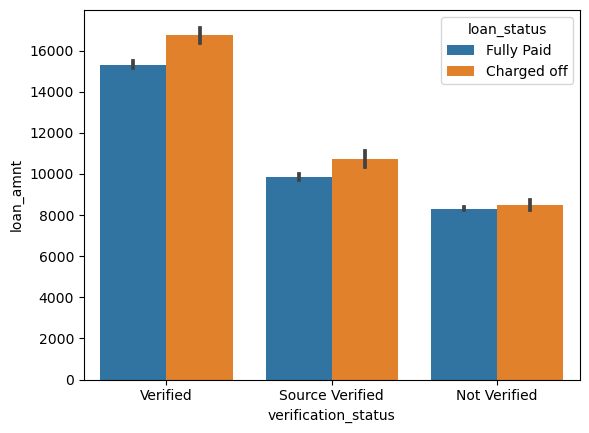

In [426]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=df_loan_A, estimator=np.mean)

Higher loan amounts are Verified more often.But see a higher charge off rate.So higher loan amounts are riskier and are also verified more often by Lending Club.

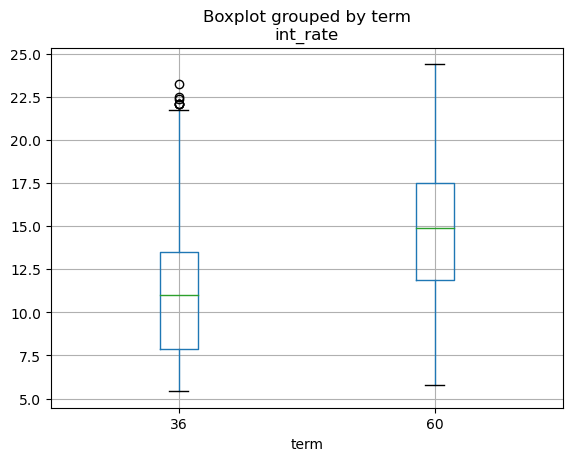

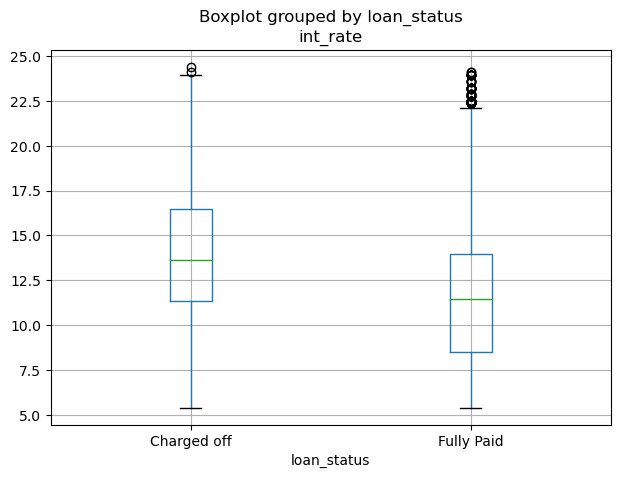

In [428]:
#Interest Rate and Term
df_loan_A.boxplot(column='int_rate', by='term')
df_loan_A.boxplot(column='int_rate', by='loan_status',figsize=(7,5))
plt.show()

Larger amounts were seen to be given for higher term. Ther rate of intrest associated with them is also high.
Loans at a higher interest rate are more likely to be Charged Off.

<AxesSubplot:>

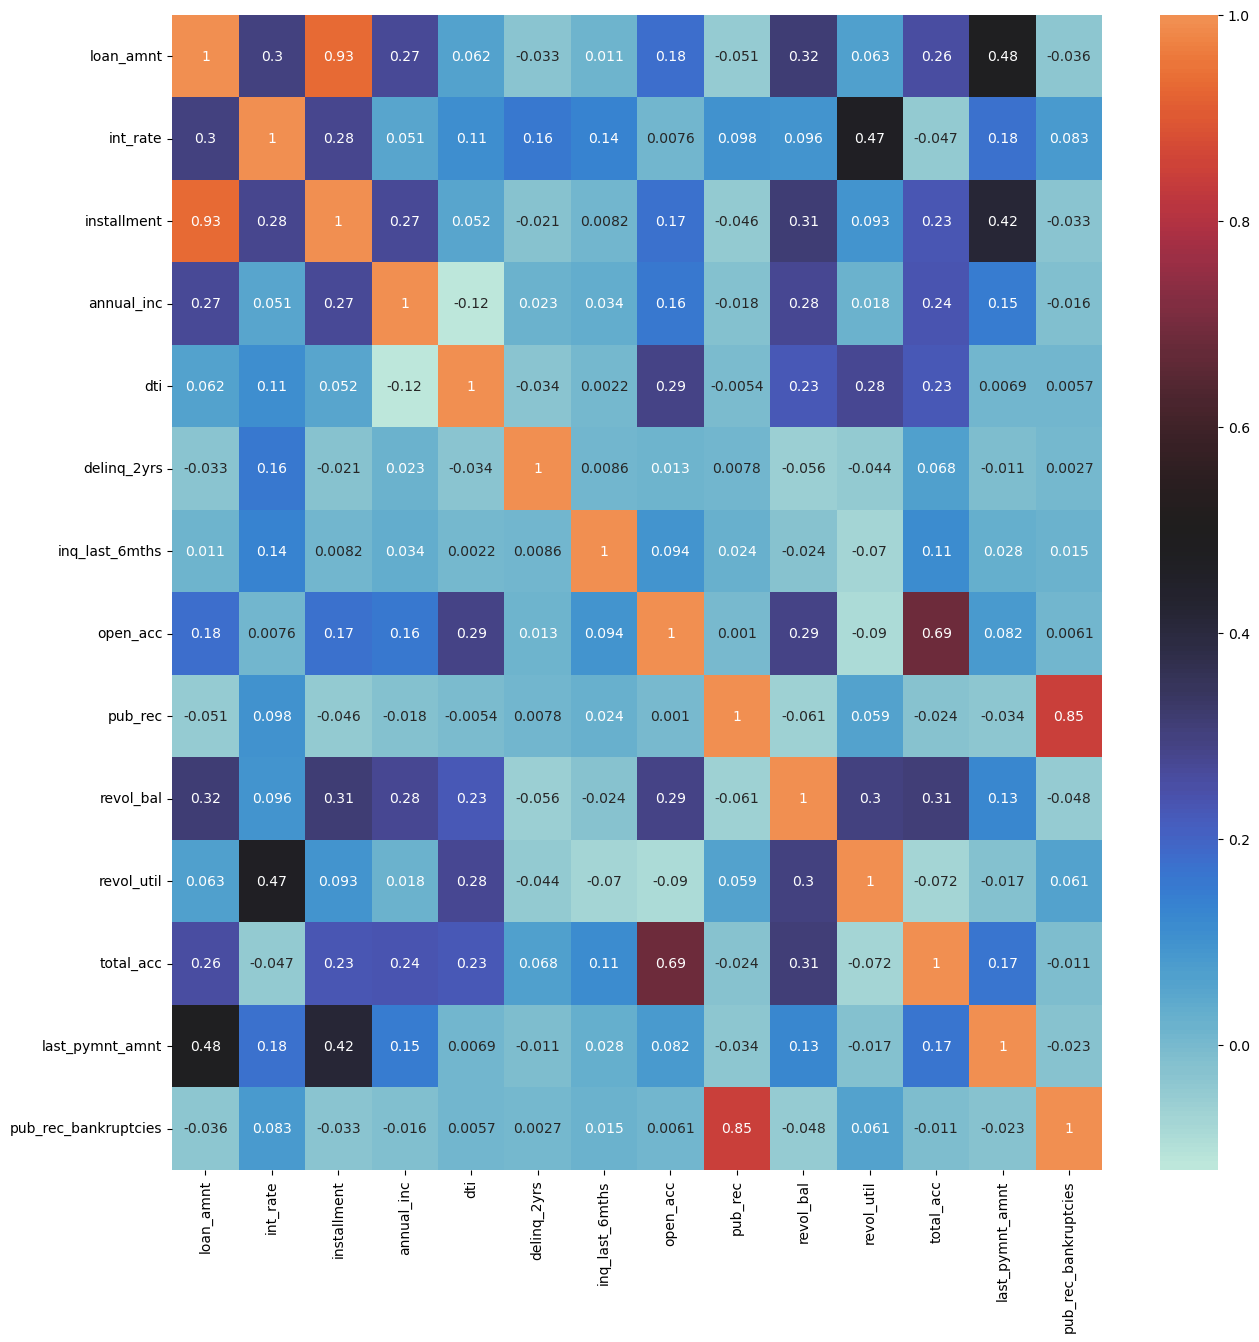

In [432]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
          'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = df_loan_A[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

Observation:

loan_amnt is correlated to last_payment_amount.

int_rate is correlated to revol_util  - This is good, as company is charging higher interest from riskier loan.

loan_amnt and revol_bal are correlated - This is not good as it suggests that higher loan amount is being approved to riskier borrowers.

delinq_2yrs is totally un-correlated with public record of bankruptcy. Therefore they represent distinct features with individual predictive value.